In [1]:
#trying to read and visualize and esize image datasets...

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#use open cv to read images
#
img = cv2.imread("Edge Tear/LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp", 0)

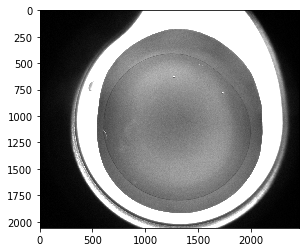

In [3]:
#display image

plt.imshow(img, cmap = 'gray')
plt.show()

In [4]:
#find shape of image
img.shape

(2058, 2456)

In [5]:
import glob
import os

In [6]:
#just for reference
os.listdir()

['.ipynb_checkpoints',
 'Augmentation.ipynb',
 'aug_optimising.ipynb',
 'data_reshape_rotate.ipynb',
 'Edge Tear',
 'Floating Lens',
 'Folded Lens',
 'Gapped Edge',
 'Image_Augmentation.ipynb',
 'In Lens Tear',
 'Multiple Lens',
 'No Lens',
 'No Shell',
 'Particles']

In [7]:
#to know the content of this folder

os.listdir('Edge Tear')

['LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp',
 'LS3_LPC 13 2019-05-29 14-47-30.562 M1 T3 1 0.bmp',
 'LS3_LPC 13 2019-05-30 11-11-11.635 M1 T1 1 0.bmp',
 'LS3_LPC 13 2019-05-31 10-44-33.700 M1 T3 1 0.bmp',
 'LS3_LPC 13 2019-05-31 11-06-37.058 M1 T3 1 0.bmp']

In [8]:
#know its length
len(os.listdir('Edge Tear/'))

5

In [9]:
print(os.listdir('Edge Tear')[0])
print(os.listdir('Edge Tear')[1])

LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-29 14-47-30.562 M1 T3 1 0.bmp


In [11]:
# trying.... but failed.. move on to next one

images = np.empty(len(os.listdir('Edge Tear/')), dtype = float)

for n in range(len(os.listdir('Edge Tear/'))):
    images[n] = cv2.imread(os.listdir('Edge Tear')[n],0)

In [12]:
type(images[0])

numpy.float64

In [13]:
images[0]

nan

In [10]:
# This is working..!!!
import glob
import cv2 as cv

path = glob.glob("Edge Tear/*.bmp")
cv_img = []
for img in path:
    n = cv.imread(img,0) #read gray scale image
    cv_img.append(n)

In [11]:
len(cv_img)

5

In [12]:
type(cv_img[0])

numpy.ndarray

In [13]:
cv_img[0].shape

(2058, 2456)

In [18]:

import glob
import cv2 as cv

#this works,.. I'm testing for non resize images now... changed 31/07/2019 4:53pm
"""
path = glob.glob("Edge Tear/*.bmp")
cv_img_1 = []
for img in path:
    n = cv.imread(img,0) #read gray scale image
    n = cv.resize(n, (224, 224))
    cv_img_1.append(n)
    """

In [14]:
 cv_img[0].shape

(2058, 2456)

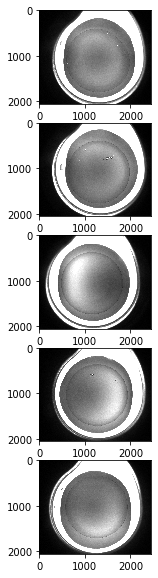

In [15]:
plt.figure(figsize=(10,10))
i = 0
for x in range(len(cv_img)):
    plt.subplot(5,1,i+1) #nrows, ncols, index
    plt.imshow(cv_img[x], cmap = 'gray')
    i = i+1

plt.show()

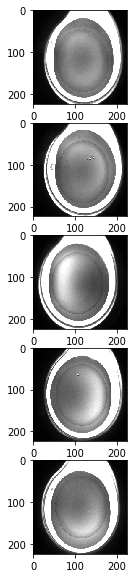

In [21]:
plt.figure(figsize=(10,10))
i = 0
for x in range(len(cv_img)):
    plt.subplot(5,1,i+1) #nrows, ncols, index
    plt.imshow(cv_img_1[x], cmap = 'gray')
    i = i+1

plt.show()

In [16]:
#image rotation
#when executed, it will open a new window to display image
import imutils
"""
for angle in np.arange(0, 360, 15):
	rotated = imutils.rotate(cv_img_1[0], angle)
	cv2.imshow("Rotated (Problematic)", rotated)
	cv2.waitKey(0)
 """
# loop over the rotation angles again, this time ensuring
# no part of the image is cut off
# for angle in np.arange(0, 360, 15):
# 	rotated = imutils.rotate_bound(cv_img_1[0], angle)
# 	cv2.imshow("Rotated (Correct)", rotated)
# 	cv2.waitKey(0)

'\nfor angle in np.arange(0, 360, 15):\n\trotated = imutils.rotate(cv_img_1[0], angle)\n\tcv2.imshow("Rotated (Problematic)", rotated)\n\tcv2.waitKey(0)\n '

In [17]:
cv_img_aug = []
for i in range(len(cv_img)):
    for angle in np.arange(0, 360, 15):
        rotated  = imutils.rotate(cv_img[i], angle)
        cv_img_aug.append(rotated)

In [19]:
print(len(cv_img_aug)) #5*24 = 120
print(cv_img_aug[0].shape)
print(cv_img_aug[10].shape)
print(cv_img_aug[76].shape)
#yes...!!! after rotation pixel size remains same

120
(2058, 2456)
(2058, 2456)
(2058, 2456)


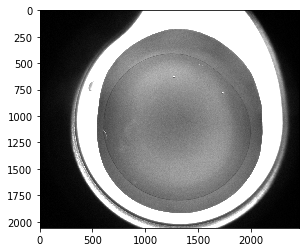

In [21]:
plt.imshow(cv_img[0], cmap='gray')

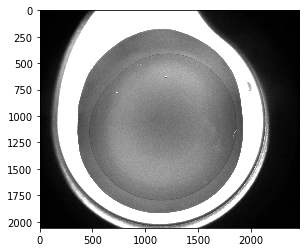

In [22]:
plt.imshow(cv2.flip(cv_img[0],1), cmap='gray') #mirror image verticle flip

In [23]:
tem_size = cv2.flip(cv_img[0],1).shape
print(tem_size)

(2058, 2456)


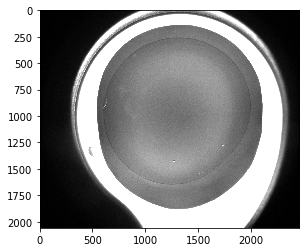

In [24]:
plt.imshow(cv2.flip(cv_img[0],0), cmap='gray') #horizontal flip

In [26]:
cv_img_aug_flip = []
for i in range(len(cv_img)):
    origin = cv_img[i]
    flip = cv.flip(cv_img[i],1)
    for angle in np.arange(0, 360, 15):
        rotated  = imutils.rotate(origin, angle)
        rotated_flip = imutils.rotate(flip, angle)
        cv_img_aug_flip.append(rotated)
        cv_img_aug_flip.append(rotated_flip)

In [27]:
len(cv_img_aug_flip) #120*2 = 240

240

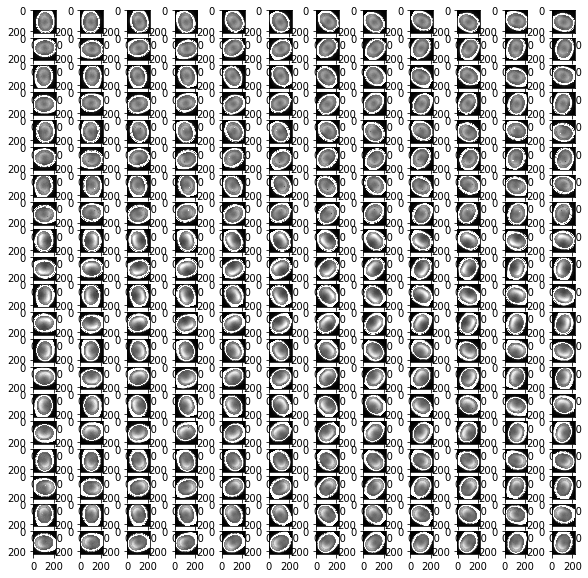

In [30]:

plt.figure(figsize=(10,10))
i = 0
for x in range(len(cv_img_aug_flip)):
    plt.subplot(20,12,i+1) #nrows, ncols, index
    plt.imshow(cv_img_aug_flip[x], cmap = 'gray')
    i = i+1

plt.show()


In [28]:
rows, cols = cv_img[0].shape

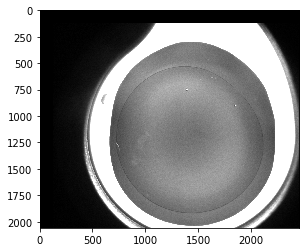

In [33]:
M = np.float32([[1,0,120],[0,1,120]])
dst = cv2.warpAffine(cv_img[0],M,(cols,rows))

plt.imshow(dst, cmap='gray')

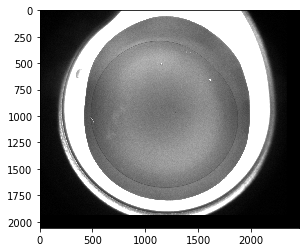

In [54]:
M = np.float32([[1,0,-120],[0,1,-120]])
dst = cv2.warpAffine(cv_img[0],M,(cols,rows))

plt.imshow(dst, cmap='gray')

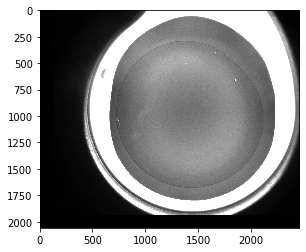

In [55]:
M = np.float32([[1,0,120],[0,1,-120]])
dst = cv2.warpAffine(cv_img[0],M,(cols,rows))

plt.imshow(dst, cmap='gray')

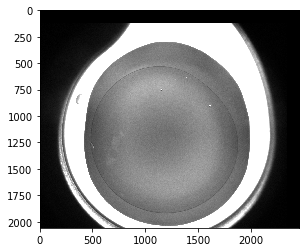

In [56]:
M = np.float32([[1,0,-120],[0,1,120]])
dst = cv2.warpAffine(cv_img[0],M,(cols,rows))

plt.imshow(dst, cmap='gray')

In [56]:
cv_img_aug_flip_trans = []

rows, cols = cv_img_1[0].shape

#define all four transformations
M1 = np.float32([[1,0,10],[0,1,10]])
M2 = np.float32([[1,0,-10],[0,1,10]])
M3 = np.float32([[1,0,10],[0,1,-10]])
M4 = np.float32([[1,0,-10],[0,1,-10]])

#start augmentation
for i in range(len(cv_img_1)):
    origin = cv_img_1[i]
    dst_ori_M1 = cv2.warpAffine(origin,M1,(cols,rows))
    dst_ori_M2 = cv2.warpAffine(origin,M2,(cols,rows))
    dst_ori_M3 = cv2.warpAffine(origin,M3,(cols,rows))
    dst_ori_M4 = cv2.warpAffine(origin,M4,(cols,rows))
    
    flip = cv.flip(cv_img_1[i],1)
    dst_flip_M1 = cv2.warpAffine(flip,M1,(cols,rows))
    dst_flip_M2 = cv2.warpAffine(flip,M2,(cols,rows))
    dst_flip_M3 = cv2.warpAffine(flip,M3,(cols,rows))
    dst_flip_M4 = cv2.warpAffine(flip,M4,(cols,rows))
    
    for angle in np.arange(0, 360, 15):
        rotated  = imutils.rotate(origin, angle)
        rotated1 = imutils.rotate(dst_ori_M1, angle)
        rotated2 = imutils.rotate(dst_ori_M2, angle)
        rotated3 = imutils.rotate(dst_ori_M3, angle)
        rotated4 = imutils.rotate(dst_ori_M4, angle)
        
        rotated_flip = imutils.rotate(flip, angle)
        rotated_flip1 = imutils.rotate(dst_flip_M1, angle)
        rotated_flip2 = imutils.rotate(dst_flip_M2, angle)
        rotated_flip3 = imutils.rotate(dst_flip_M3, angle)
        rotated_flip4 = imutils.rotate(dst_flip_M4, angle)
        
        cv_img_aug_flip_trans.append(rotated)
        cv_img_aug_flip_trans.append(rotated1)
        cv_img_aug_flip_trans.append(rotated2)
        cv_img_aug_flip_trans.append(rotated3)
        cv_img_aug_flip_trans.append(rotated4)
        cv_img_aug_flip_trans.append(rotated_flip)
        cv_img_aug_flip_trans.append(rotated_flip1)
        cv_img_aug_flip_trans.append(rotated_flip2)
        cv_img_aug_flip_trans.append(rotated_flip3)
        cv_img_aug_flip_trans.append(rotated_flip4)

In [54]:
len(cv_img_aug_flip_trans) #5 images, each image flipped and translated into 5 variants, 
                            #each of these images are rotated into 24 different orientations.
    # 5*2*5*24

1200

In [40]:
temp1 = cv_img_1[0].reshape(-1,1)

In [41]:
temp1.shape

(50176, 1)

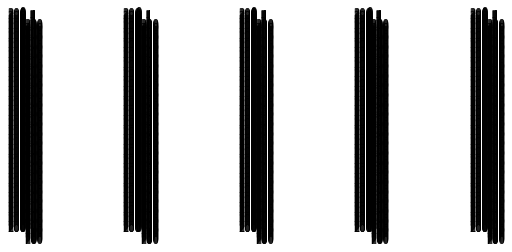

In [48]:
plt.figure(figsize=(10,10))
i = 0
for x in range(len(cv_img_aug_flip_trans)):
    plt.subplot(600,5,i+1) #nrows, ncols, index
    plt.imshow(cv_img_aug_flip_trans[x], cmap = 'gray')
    i = i+1

plt.show()


In [47]:
status = cv.imwrite('New_images', cv_img_aug_flip_trans[0])

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [57]:
for i in range(len(cv_img_aug_flip_trans)):
    cv.imwrite("New images/img"+str(i)+".bmp",cv_img_aug_flip_trans[i])

In [ ]:
#let try zooming in and out